In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
data = pd.read_csv('../../data/bikes_rent.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
season            731 non-null int64
yr                731 non-null int64
mnth              731 non-null int64
holiday           731 non-null int64
weekday           731 non-null int64
workingday        731 non-null int64
weathersit        731 non-null int64
temp              731 non-null float64
atemp             731 non-null float64
hum               731 non-null float64
windspeed(mph)    731 non-null float64
windspeed(ms)     731 non-null float64
cnt               731 non-null int64
dtypes: float64(5), int64(8)
memory usage: 74.3 KB


In [4]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


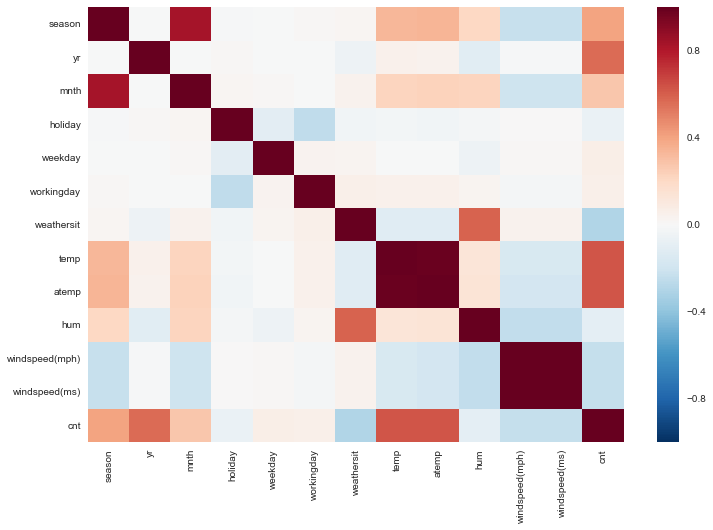

In [5]:
sns.heatmap(data.corr());

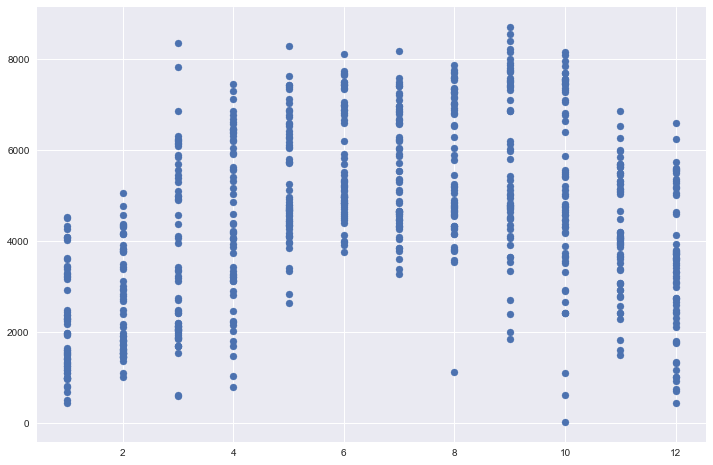

In [6]:
plt.scatter(data.mnth, data.cnt);

In [7]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
linreg = LinearRegression()
X, y = data.drop('cnt', axis=1).values, data['cnt'].values

train_part_size = int(.7 * X.shape[0])

X_train, X_test = X[:train_part_size, :], X[train_part_size:, :]
y_train, y_test = y[:train_part_size], y[train_part_size:]

## Scaling 
<img src='./img/StdScaling.png' width=40%>

In [9]:
# ?LinearRegression()

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Linear Regression

In [11]:
linreg.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
np.sqrt(mean_squared_error(y_test, linreg.predict(X_test_scaled)))

1121.7946376066741

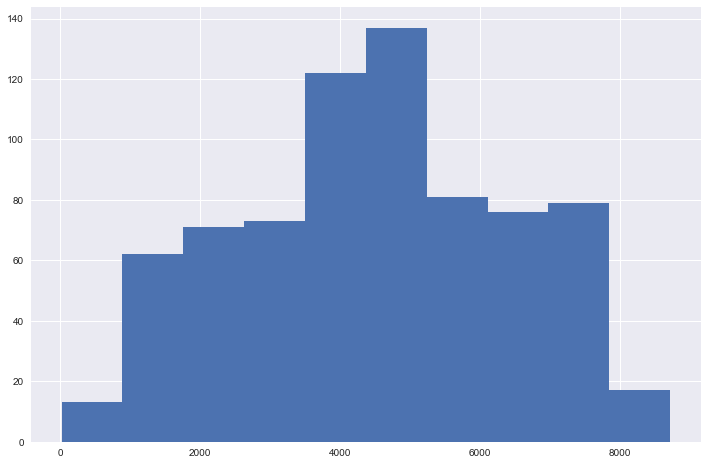

In [13]:
data['cnt'].hist()

In [14]:
linreg.coef_

array([  4.04858423e+02,   9.54070786e+02,   3.08092687e+01,
        -6.75739612e+01,   1.03710951e+02,   1.47024473e+01,
        -2.93814776e+02,   6.25043859e+01,   8.91153164e+02,
        -1.58978911e+02,  -3.04830474e+12,   3.04830474e+12])

In [15]:
pd.DataFrame(linreg.coef_, data.columns[:-1], columns=['coef']).sort_values(by='coef', ascending=False)

,coef
windspeed(ms),3.048305e+12
yr,9.540708e+02
atemp,8.911532e+02
season,4.048584e+02
weekday,1.037110e+02
temp,6.250439e+01
mnth,3.080927e+01
workingday,1.470245e+01
holiday,-6.757396e+01
hum,-1.589789e+02


In [16]:
def train_validate_report(model, X_train_scaled, y_train,
                         X_test_scaled, y_test, feature_names):
    """
    For linear models and regression trees
    """
    model.fit(X_train_scaled, y_train)
    print("MSE=%f" % np.sqrt(mean_squared_error(y_test, 
                                     model.predict(X_test_scaled))))
    print("Model coefficients:")
    print(pd.DataFrame(model.coef_, 
             feature_names, columns=["Coef"]).sort_values(by="Coef",
                                                        ascending=False))

In [17]:
from sklearn.model_selection import cross_val_score, KFold

train_validate_report(linreg, X_train_scaled, y_train, X_test_scaled, y_test, feature_names=data.columns[:-1])


MSE=1121.794638
Model coefficients:
                        Coef
windspeed(ms)   3.048305e+12
yr              9.540708e+02
atemp           8.911532e+02
season          4.048584e+02
weekday         1.037110e+02
temp            6.250439e+01
mnth            3.080927e+01
workingday      1.470245e+01
holiday        -6.757396e+01
hum            -1.589789e+02
weathersit     -2.938148e+02
windspeed(mph) -3.048305e+12


## L2-регуляризация(Ridge)
<img src='./img/regularization.png' width=40%>
<img src='./img/L2.png' width=40%>
<img src='./img/ridge_sln.png' width=35%>
<img src='./img/ridge.png' width=60%>


## L1-регуляризация(LASSO)


<img src='./img/L1.png' width=40%>

In [18]:
lasso = Lasso(alpha=10)
train_validate_report(lasso, X_train_scaled, y_train, X_test_scaled, y_test, feature_names=data.columns[:-1])

MSE=1122.241658
Model coefficients:
                      Coef
atemp           941.051262
yr              935.629487
season          399.234357
weekday          94.925850
mnth             17.008133
workingday        7.027957
temp              6.604278
windspeed(ms)    -0.000000
holiday         -59.738048
hum            -144.186540
windspeed(mph) -176.292890
weathersit     -291.522886


In [19]:
ridge = Ridge()
train_validate_report(ridge, X_train_scaled, y_train, X_test_scaled, y_test, feature_names=data.columns[:-1])

MSE=1119.560520
Model coefficients:
                      Coef
yr              954.075878
atemp           730.747340
season          400.114172
temp            221.406072
weekday         103.198680
mnth             34.687740
workingday       15.334339
holiday         -69.046689
windspeed(ms)   -95.819798
windspeed(mph)  -95.819798
hum            -157.702520
weathersit     -293.899386


# Подбор параметров


In [20]:
from sklearn.model_selection import GridSearchCV


lassoAlpha = Lasso()
alpha_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid = GridSearchCV(estimator=lassoAlpha, cv=4, param_grid=alpha_params, verbose = 1, n_jobs=1)
grid.fit(X = X_train_scaled, y = y_train)

Fitting 4 folds for each of 7 candidates, totalling 28 fits


D:\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the n

GridSearchCV(cv=4, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [21]:
grid.best_estimator_

Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)